3.315719351999924
1.5134993629397326
[    0. 30328. 51902. 67603. 79299. 88208. 95139.]
[0.         0.25000863 0.50000912 0.75001091 1.00000424 1.2500156
 1.50000897]
[0.16238466 0.191933   0.20609976 0.2082274  0.20276632 0.19319502
 0.18178383]


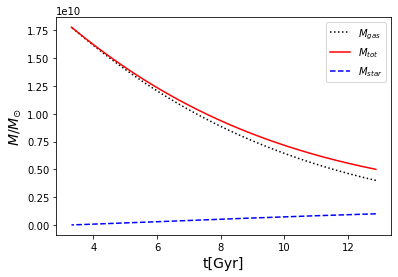

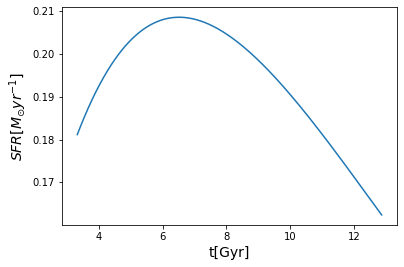

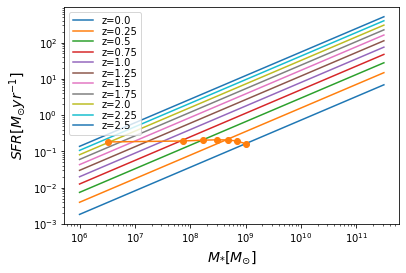

In [34]:
import math
import matplotlib.pyplot as plt
import numpy as np

y_z = 0.07
f_b = 0.2
R = 0.46
Omega_L0 = 0.6911
Omega_r0 = 0
Omega_m0 = 0.3089
h_0 = 0.6774
#Note the difference between h_0 here and h below 

a_0 = 1.0/1.0               #1.0/(1+z), where z = 0
M_vir_0 =10**11.2     #the halo mass at z = 0
M_gas_0 =4*(10**9)      #the gas mass at z = 0
M_tot_0 =10**9+4*(10**9)      #the total mass at z = 0
#Z_0 = 0.0238180163786       #the metallicity at z = 0
S_0 =0.16238466/4.0                    #the SFE at z = 0
S_index = -1.5              #the parameter in S(z)
B_0 = 4                   #the mass loading factor at z = 0
B_index = 1.3                  #the parameter in B(z)

#get an array of z and t
Arr = dict(np.load('/huawei/osv1/chenyaoxin/workspace/Data/redshift-evolution_time10**(-4).npz'))
#data from the code of upper block
z_values = Arr['redshift']
t_values = Arr['evolution_time']
num = z_values.shape[0]

#define S(z)
def S(z):
    return S_0*((1+z)**S_index)
#define B(z)
def B(z):
    return B_0*((1+z)**B_index)
#define M_vir(z)
def M_vir(z):
    return M_vir_0*math.exp(0-8.2*a_0/13.0+8.2/(13.0*(1+z)))
#get an array of S
S_values=[S(z) for z in z_values]
#get an array of B
B_values=[B(z) for z in z_values]
#get an array of M_vir
M_vir_values=[M_vir(z) for z in z_values]

delta_M_vir_values = np.array([])
flag = 0
while flag <= num-2:
    delta_M_vir_values = np.append(delta_M_vir_values, M_vir_values[flag+1]-M_vir_values[flag])
    flag += 1
    
delta_M_infall_values = np.array([])
flag = 0
while flag <= num-2:
    result = 0.01*delta_M_vir_values[flag]
    delta_M_infall_values = np.append(delta_M_infall_values, result)
    flag +=1
    
M_gas_values = np.array([M_gas_0])
flag = 0
while flag <= num-2:
    result1 = 0-(1-R+B_values[flag])*S_values[flag]*M_gas_values[flag]*(t_values[flag+1]-t_values[flag])+delta_M_infall_values[flag]
    result2 = M_gas_values[flag]+result1
    M_gas_values = np.append(M_gas_values, result2)
    flag +=1

M_tot_values = np.array([M_tot_0])
flag = 0
while flag <= num-2:
    result1 = delta_M_infall_values[flag]-B_values[flag]*S_values[flag]*M_gas_values[flag]*(t_values[flag+1]-t_values[flag])
    result2 = M_tot_values[flag]+result1
    M_tot_values = np.append(M_tot_values,result2)
    flag += 1

M_star_values = np.array([])
flag = 0
while flag <= num-1:
    M_star_values = np.append(M_star_values, M_tot_values[flag]-M_gas_values[flag])
    flag += 1

SFR_values = np.array([])
flag = 0
while flag <= num-1:
    SFR_values = np.append(SFR_values, S_values[flag]*M_gas_values[flag]/(10**9))
    flag += 1
'''
Z_values = np.array([Z_0])
flag = 0
while flag <= num-2:
    result1 = y_z*(1-R)*S_values[flag]*(t_values[flag+1]-t_values[flag])-(Z_values[flag]*delta_M_infall_values[flag]/M_gas_values[flag])
    result2 = Z_values[flag]+result1
    Z_values = np.append(Z_values, result2)
    flag += 1
'''

flag = 0
while flag <= num-1:
    if M_star_values[flag]>0:
        flag += 1
    else:
        break

judge_number = flag-1
print(t_values[judge_number])
print(z_values[judge_number])

#M
plt.figure('The first figure')
plt.plot(t_values[0:judge_number],M_gas_values[0:judge_number],color="black",linestyle=":",label='${M_{gas}}$')
plt.plot(t_values[0:judge_number],M_tot_values[0:judge_number],color="red",linestyle="-",label='${M_{tot}}$')
plt.plot(t_values[0:judge_number],M_star_values[0:judge_number],color="blue",linestyle="--",label='${M_{star}}$')
plt.xlabel("t[Gyr]",fontsize=14)
plt.ylabel("${M}$/${M_{\odot}}$",fontsize=14)
plt.legend(loc=1)
plt.savefig('/huawei/osv1/chenyaoxin/workspace/Figure/working-total/M.pdf')
'''
#Z
plt.figure('The second figure')
plt.plot(t_values[0:judge_number],Z_values[0:judge_number])
plt.xlabel("t[Gyr]",fontsize=14)
plt.ylabel("Z",fontsize=14)
plt.savefig('/huawei/osv1/chenyaoxin/workspace/Figure/working-total/Z.pdf')
'''
#SFR
plt.figure('The third figure')
plt.plot(t_values[0:judge_number],SFR_values[0:judge_number])
plt.xlabel("t[Gyr]",fontsize=14)
plt.ylabel("${SFR}$${[M_{\odot}yr^{-1}]}$",fontsize=14)
plt.savefig('/huawei/osv1/chenyaoxin/workspace/Figure/working-total/SFR.pdf') 

import math
import matplotlib.pyplot as plt
import numpy as np

A_11 = 3.24 #M_sun/yr
beta = -0.35
alpha = 3.45

def SFR(M_star,z):
    s = A_11*((M_star*1.00/(10**11))**(1+beta))*((1+z)**alpha)
    return s

z_values_obs = np.array([0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5])

M_star_values_obs = np.array([10**6,10**6.5,10**7,10**7.5,10**8,10**8.5,10**9,10**9.5,10**10,10**10.5,10**11,10**11.5])

#get an array of z and t
Arr = dict(np.load('/huawei/osv1/chenyaoxin/workspace/Data/redshift-evolution_time10**(-4).npz'))
#data from the code of upper block
z_values = Arr['redshift']
t_values = Arr['evolution_time']
num = z_values.shape[0]

flag1 = 0
flag2 = 0
index = np.array([])
z_values_ele = np.array([])
while flag1 <= z_values_obs.shape[0]-1:
    while flag2 <= judge_number:
        if z_values[flag2] >= z_values_obs[flag1]:
            index = np.append(index, flag2)
            z_values_ele = np.append(z_values_ele, z_values[flag2])
            break
        flag2 += 1
    flag1 += 1
print(index)
print(z_values_ele)
    
plt.figure('The fourth figure')
flag = 0
SFR_values_obs = np.array([])
while flag <= z_values_obs.shape[0]-1:
    SFR_values_obs = np.array([SFR(M_star,z_values_obs[flag]) for M_star in M_star_values_obs])
    plt.loglog(M_star_values_obs,SFR_values_obs,label='z='+str(z_values_obs[flag]))
    flag += 1

flag = 0
M_star_values_model = np.array([])
SFR_values_model = np.array([])
while flag <= z_values_ele.shape[0]-1:
    M_star_values_model = np.append(M_star_values_model, M_star_values[int(index[flag])])
    SFR_values_model = np.append(SFR_values_model, SFR_values[int(index[flag])])
    flag += 1
print(SFR_values_model)
plt.loglog(M_star_values_model, SFR_values_model, '-o')

plt.xlabel("${M_{*}}$$[{M_{\odot}}]$",fontsize=14)
plt.ylabel("${SFR}$${[M_{\odot}yr^{-1}]}$",fontsize=14)
plt.legend(loc=2,labelspacing=0.05)


